# COMP4318/COMP5318 Assignment 2

In this template, we have provided data loading code and section headings to help structure your notebook. Please refer to the assignment specification pdf to guide the content of your notebook and report.


(Add SIDs here)

# Setup

In [102]:
# Please include your imports in this cell
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import pandas as pd


# Data loading, exploration, and preprocessing

## Data loading

In [79]:
# Load data files assuming Assignment2Data folder 
# is present in the same directory as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

## Data exploration

In [80]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13673, 28, 28, 3), (13673,), (3419, 28, 28, 3), (3419,))

In [81]:
unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)
num_classes = len(unique_classes_train)
num_classes



8

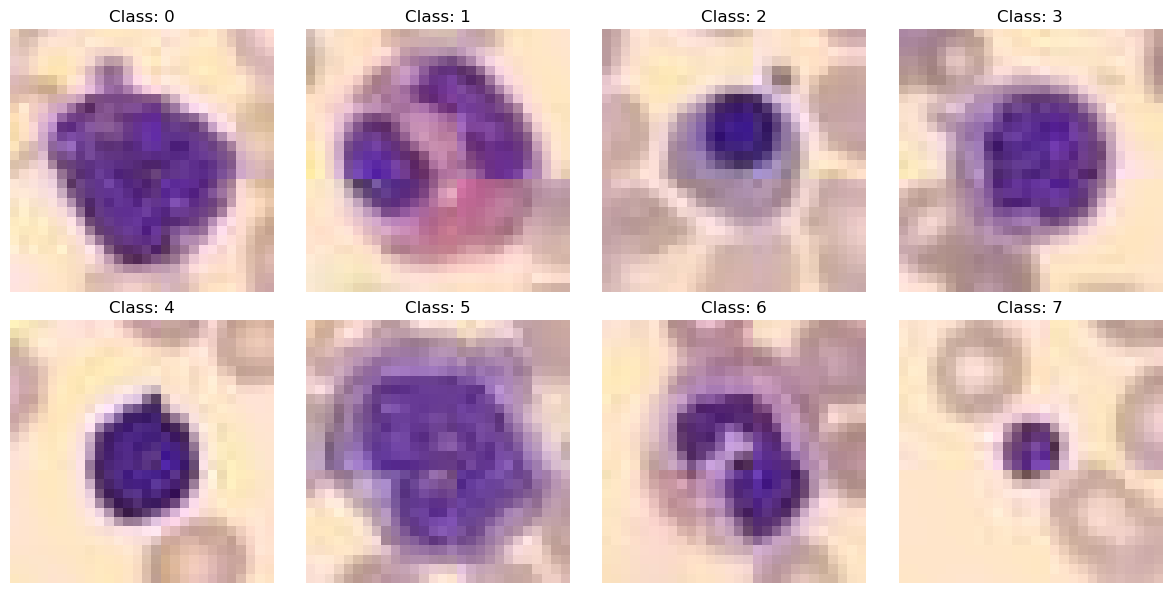

In [82]:
# Define the number of unique classes
num_classes = 8

# Create a figure with a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Initialize a list to keep track of selected images for each class
selected_indices = []

# Select a random image from each class
for class_label in range(num_classes):
    # Find indices of images with the current class label
    class_indices = np.where(y_train == class_label)[0]
    
    # Randomly select an index from the class
    random_index = np.random.choice(class_indices)
    
    # Ensure the same class is not selected again
    while random_index in selected_indices:
        random_index = np.random.choice(class_indices)
    
    # Add the selected index to the list
    selected_indices.append(random_index)
    
    # Get the image and display it
    image = X_train[random_index]
    row = class_label // 4  # Calculate the row index in the grid
    col = class_label % 4   # Calculate the column index in the grid
    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Class: {class_label}")
    axes[row, col].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the grid of images
plt.show()

## inbalanced data set

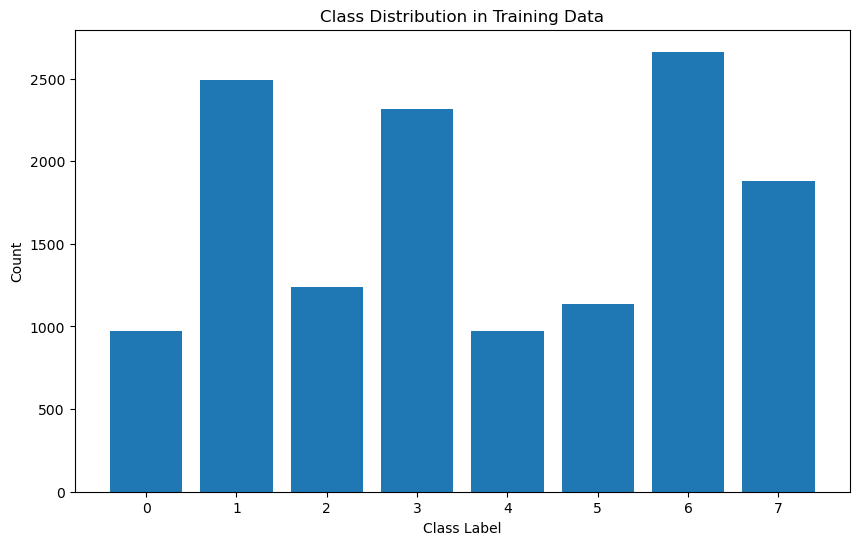

In [83]:

# Calculate the count of examples for each class
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(10, 6))
plt.bar(unique_classes, class_counts)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution in Training Data')
plt.xticks(unique_classes)
plt.show()

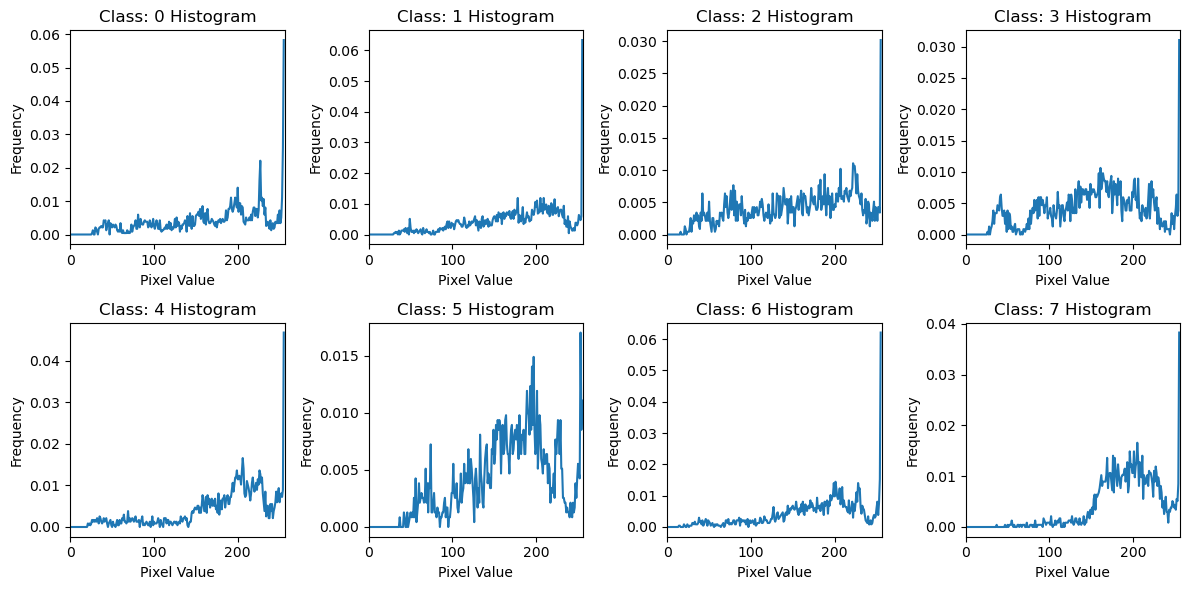

In [84]:
def plot_histograms_of_selected_classes(X_train, y_train, num_classes=8):
    # Create a figure with a 2x4 grid for displaying histograms
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    
    # Initialize a list to keep track of selected images for each class
    selected_indices = []
    
    # Select a random image from each class and create histograms
    for class_label in range(num_classes):
        # Find indices of images with the current class label
        class_indices = np.where(y_train == class_label)[0]
        
        # Randomly select an index from the class
        random_index = np.random.choice(class_indices)
        
        # Ensure the same class is not selected again
        while random_index in selected_indices:
            random_index = np.random.choice(class_indices)
        
        # Add the selected index to the list
        selected_indices.append(random_index)
        
        # Get the image
        image = X_train[random_index]
        
        # Create a histogram of pixel intensities
        histogram = np.histogram(image.ravel(), bins=256, range=(0, 256), density=True)
        
        # Display the histogram
        row = class_label // 4  # Calculate the row index in the grid
        col = class_label % 4   # Calculate the column index in the grid
        axes[row, col].plot(histogram[1][:-1], histogram[0])
        axes[row, col].set_title(f"Class: {class_label} Histogram")
        axes[row, col].set_xlim(0, 256)
        axes[row, col].set_xlabel("Pixel Value")
        axes[row, col].set_ylabel("Frequency")
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Show the grid of histograms
    plt.show()

# Call the function to plot histograms of pixel intensities for selected classes
plot_histograms_of_selected_classes(X_train, y_train, num_classes=8)

## Preprocessing

### preprocessing for MLP model

In [85]:

def process_data_tf(X_train_raw, y_train_raw, X_test_raw, y_test_raw):
    # Data Augmentation using TensorFlow
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
    ])
    
    # Apply augmentation
    X_train_augmented = data_augmentation(X_train_raw, training=True).numpy()
    
    # Flattening the data for scaling
    X_train_flattened = X_train_augmented.reshape(X_train_augmented.shape[0], -1)
    X_test_flattened = X_test_raw.reshape(X_test_raw.shape[0], -1)
    
    # Scaling the data using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_flattened)
    X_test_scaled = scaler.transform(X_test_flattened)
    
    # Reshape back to original shape
    X_train_scaled = X_train_scaled.reshape(X_train_augmented.shape)
    X_test_scaled = X_test_scaled.reshape(X_test_raw.shape)
    
    # One-hot encoding the target labels
    y_train_encoded = to_categorical(y_train_raw)
    y_test_encoded = to_categorical(y_test_raw)
    
    return X_train_scaled, y_train_encoded, X_test_scaled, y_test_encoded

X_train_processed, y_train_encoded, X_test_processed, y_test_encoded = process_data_tf(X_train, y_train, X_test, y_test)



## Examples of preprocessed data
Please print/display some examples of your preprocessed data here. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

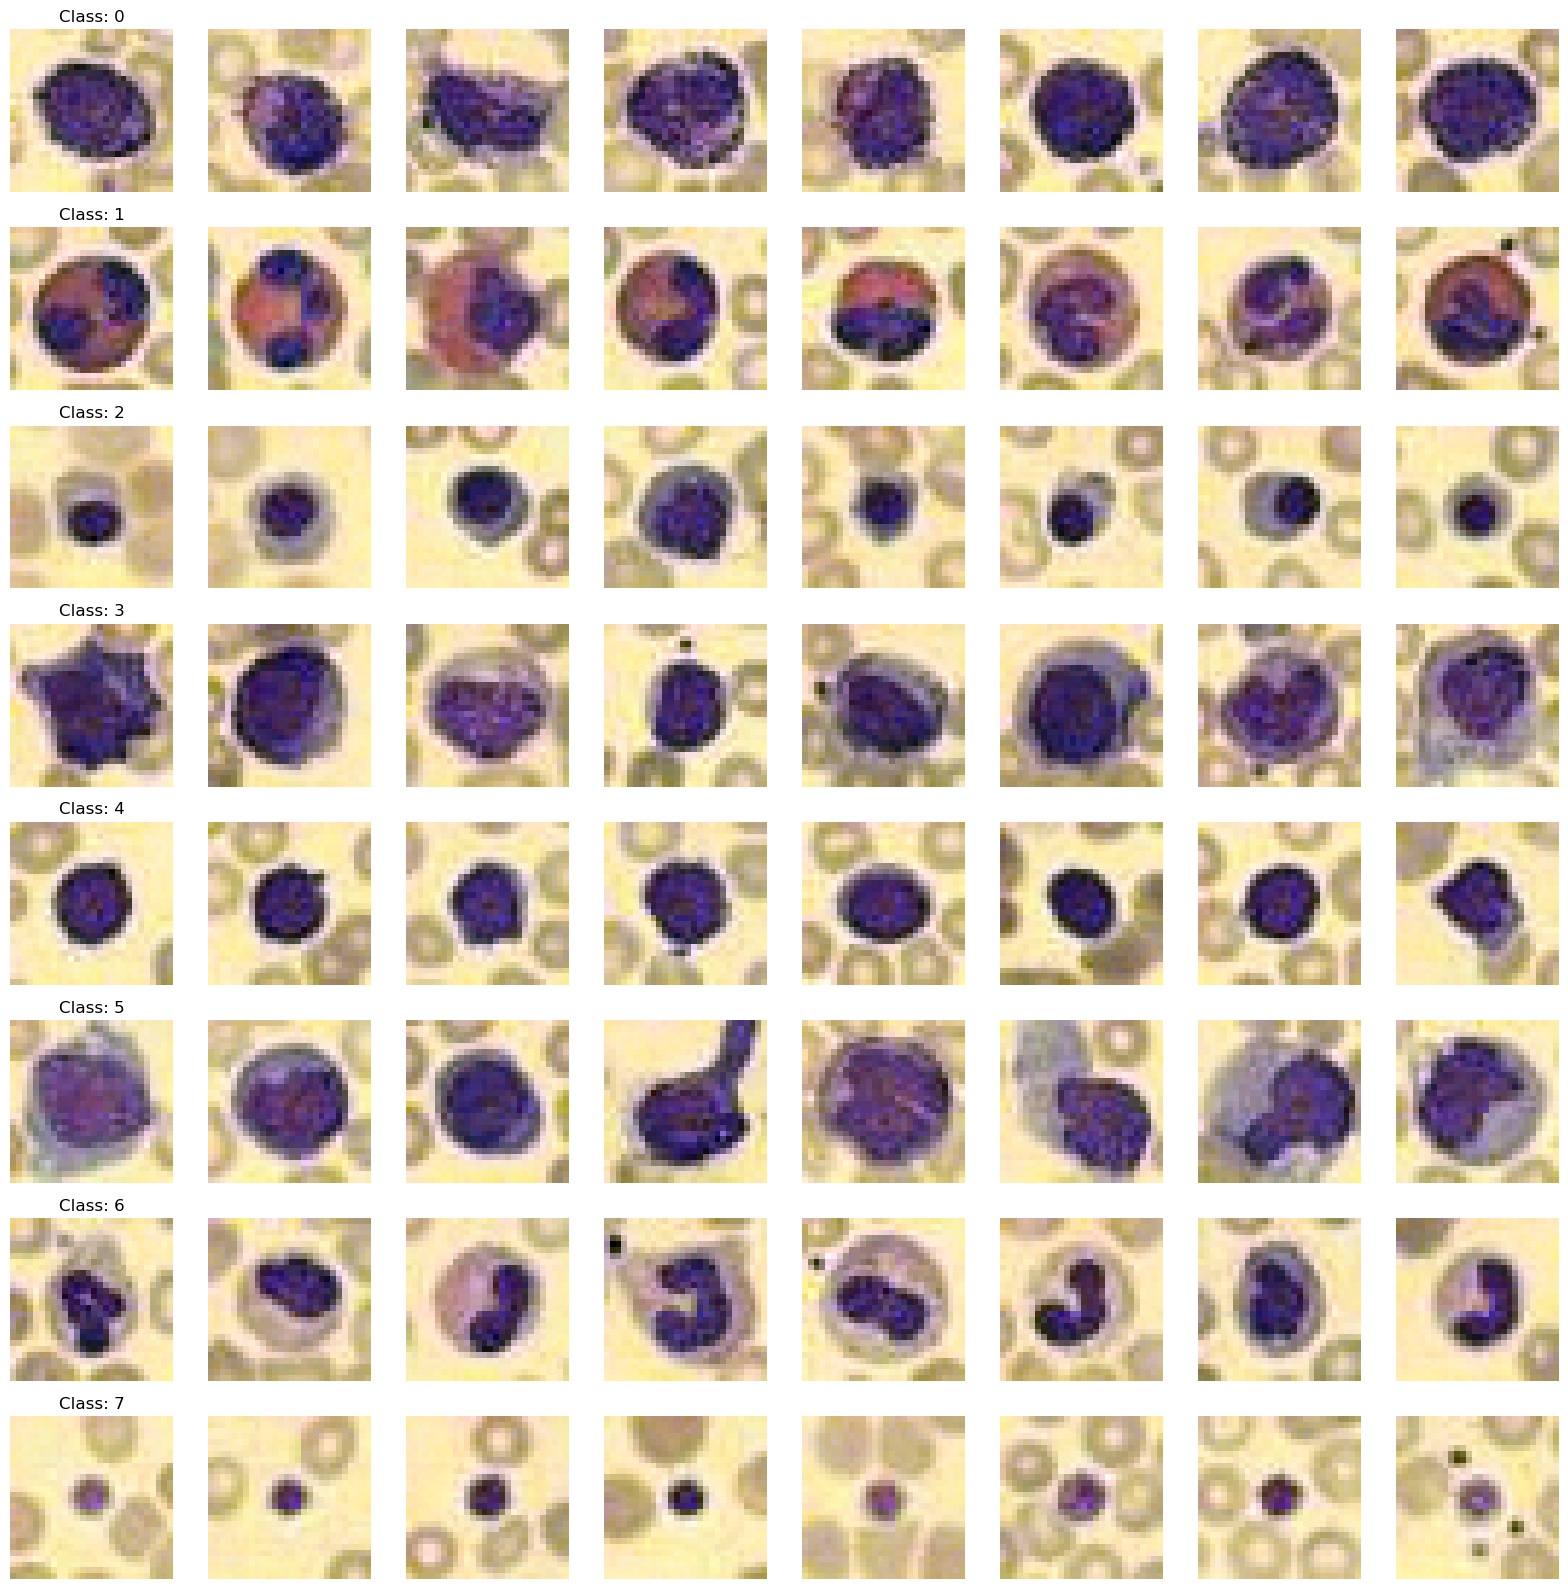

In [19]:

def visualize_sample_images_8x8(X_data, y_data):
    fig, axes = plt.subplots(8, 8, figsize=(16, 16))
    
    for class_label in range(8):
        # Find indices of images with the current class label
        class_indices = np.where(y_data == class_label)[0]
        
        # Randomly select 8 indices from the class without replacement
        random_indices = np.random.choice(class_indices, 8, replace=False)
        
        for col, idx in enumerate(random_indices):
            # Get the image
            image = X_data[idx]
            
            # Display the image
            axes[class_label, col].imshow(image, cmap='gray')
            axes[class_label, col].axis('off')
            
            # Set title for the first column only
            if col == 0:
                axes[class_label, col].set_title(f"Class: {class_label}")

    plt.tight_layout()
    plt.show()

visualize_sample_images_8x8(X_train_scaled, y_train)



# Algorithm design and setup

## Model 1 - Fully Connected Neural Network

Epoch 1/300
107/107 [==============================] - 1s 3ms/step - loss: 1.7350 - accuracy: 0.3405 - val_loss: 1.3313 - val_accuracy: 0.6016
Epoch 2/300
107/107 [==============================] - 0s 2ms/step - loss: 1.3297 - accuracy: 0.5016 - val_loss: 1.0085 - val_accuracy: 0.6511
Epoch 3/300
107/107 [==============================] - 0s 2ms/step - loss: 1.1944 - accuracy: 0.5406 - val_loss: 1.0252 - val_accuracy: 0.6092
Epoch 4/300
107/107 [==============================] - 0s 2ms/step - loss: 1.1238 - accuracy: 0.5703 - val_loss: 0.8643 - val_accuracy: 0.6674
Epoch 5/300
107/107 [==============================] - 0s 2ms/step - loss: 1.0566 - accuracy: 0.5983 - val_loss: 0.7989 - val_accuracy: 0.7125
Epoch 6/300
107/107 [==============================] - 0s 2ms/step - loss: 0.9997 - accuracy: 0.6201 - val_loss: 0.8282 - val_accuracy: 0.6914
Epoch 7/300
107/107 [==============================] - 0s 2ms/step - loss: 0.9776 - accuracy: 0.6319 - val_loss: 0.7564 - val_accuracy: 0.7078

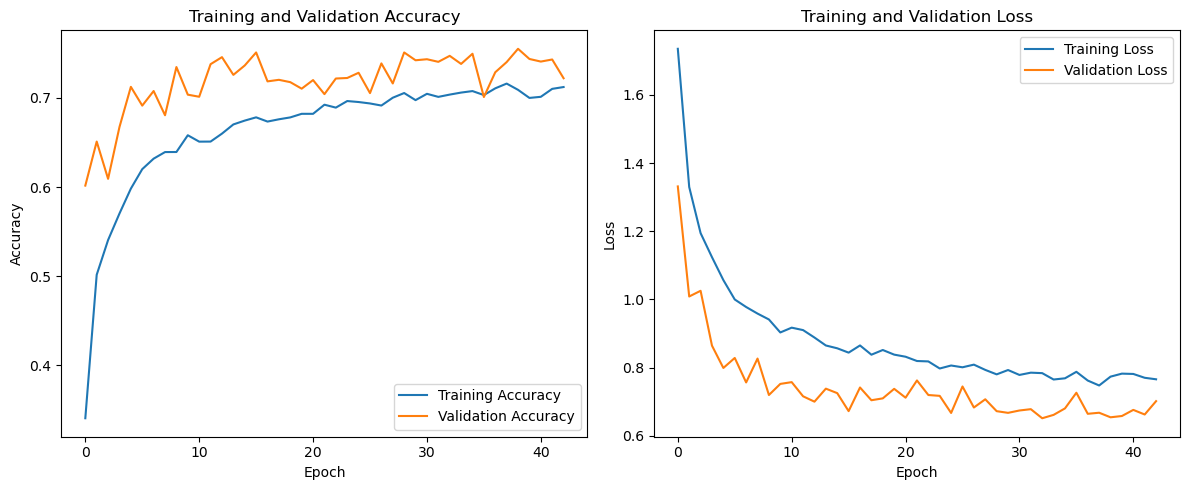

Validation Loss: 0.6514
Validation Accuracy: 0.7473


In [50]:
def build_mlp(input_shape=None,
              n_units=[128, 64],
              dropout_rates=[0.2, 0.2],
              optimizer='adam',
              activation='relu',
              output_activation='softmax'):
    """
    Function to create an MLP model based on provided hyperparameters.
    """
    if input_shape is None:
        raise ValueError("input_shape must be provided")
    
    # Create the model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    
    for units, dropout_rate in zip(n_units, dropout_rates):
        model.add(tf.keras.layers.Dense(units, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(len(y_train_encoded[0]), activation=output_activation))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the function
mlp_model = build_mlp(input_shape=X_train_processed.shape[1:])

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = mlp_model.fit(X_train_processed, y_train_encoded,
                        epochs=300,
                        batch_size=128,
                        validation_data=(X_test_processed, y_test_encoded),
                        callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = mlp_model.evaluate(X_test_processed, y_test_encoded)

# Visualization
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


## Model 2 - Convolutional Neural Network

In [88]:
# Importing necessary libraries for building the CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Function to create a simple CNN model
def create_simple_cnn(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Creating the CNN model
input_shape = X_train_processed.shape[1:]  # (28, 28, 3)
model = create_simple_cnn(input_shape)
model.summary()

# Training the model
num_classes = len(np.unique(y_train))
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=128, validation_data=(X_test_processed, y_test))


Model: "sequential_1547"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1543 (Flatten)      (None, 1600)              0         
                                                                 
 dense_4628 (Dense)          (None, 64)            

## Model 3 - KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_2d)
X_test_std = scaler.transform(X_test_2d)

# Initialize kNN classifier (we'll start with k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train_std, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_std)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5972506580871599

## Model 4 - Random forest

In [70]:
# Reshape the data to be 2D
X_train_2d = X_train_processed.reshape(X_train_processed.shape[0], -1)
X_test_2d = X_test_processed.reshape(X_test_processed.shape[0], -1)

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the reshaped training data
y_train_single = np.argmax(y_train_encoded, axis=1)
rf_model.fit(X_train_2d, y_train_single)

# Predict on the reshaped test data
y_pred = rf_model.predict(X_test_2d)

# Ensure the labels are single dimensional for evaluation
y_test_single = np.argmax(y_test_encoded, axis=1)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test_single, y_pred)

print(f"Random Forest Validation Accuracy: {accuracy_rf:.4f}")


Random Forest Validation Accuracy: 0.8111


# Hyperparameter tuning

## Model 1 - Fully Connected Neural Network

In [51]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

def build_mlp(input_shape,
              n_units=[128, 64],
              dropout_rates=[0.2, 0.2],
              optimizer='adam',
              activation='relu',
              output_activation='softmax'):
    """
    Function to create an MLP model based on provided hyperparameters.
    """
    # Create the model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    
    for units, dropout_rate in zip(n_units, dropout_rates):
        model.add(tf.keras.layers.Dense(units, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(len(y_train_encoded[0]), activation=output_activation))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Wrap the Keras Model for scikit-learn
# Wrap the Keras Model for scikit-learn, setting the input_shape directly
model = KerasClassifier(model=build_mlp, 
                        input_shape=X_train_processed.shape[1:],
                        verbose=0)

# The rest of the hyperparameter tuning setup remains the same.
# ...


# Define the hyperparameter space
param_dist = {
    'model__n_units': [[32, 16], [64, 32], [128, 64], [256, 128]],
    'model__dropout_rates': [[0.1, 0.1], [0.2, 0.2], [0.3, 0.3], [0.4, 0.4]],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [32, 64, 128],
    'epochs': [20, 40, 60]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=3, 
                                   verbose=1)

# Run RandomizedSearchCV
random_search_result = random_search.fit(X_train_processed, y_train_encoded)

# Check the results
print("Best Score: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Score: 0.723104 using {'model__optimizer': 'rmsprop', 'model__n_units': [128, 64], 'model__dropout_rates': [0.1, 0.1], 'model__activation': 'relu', 'epochs': 60, 'batch_size': 32}


In [46]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV


model = KerasClassifier(model=build_mlp, 
                        input_shape=X_train_processed.shape[1:],
                        verbose=0)


# Define the hyperparameter grid (this is a simplified grid for demonstration)
param_grid = {
    'model__n_units': [[32, 16], [128, 64]],
    'model__dropout_rates': [[0.1, 0.1], [0.2, 0.2]],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu'],
    'batch_size': [32, 128],
    'epochs': [20, 40]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           cv=3, 
                           verbose=1)

# Run GridSearchCV
grid_search_result = grid_search.fit(X_train_processed, y_train_encoded)

# Display the results
print("Best Score: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Score: 0.750896 using {'batch_size': 128, 'epochs': 40, 'model__activation': 'relu', 'model__dropout_rates': [0.1, 0.1], 'model__n_units': [128, 64], 'model__optimizer': 'adam'}


## Model 2 - Convolutional Neural Network

In [106]:
from scikeras.wrappers import KerasClassifier

def build_cnn(optimizer='adam', dropout_rate=0.5, num_filters_1=32, num_filters_2=64, dense_units=64):
    model = Sequential()
    model.add(Conv2D(num_filters_1, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(num_filters_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=build_cnn, 
                        optimizer='adam',
                        dropout_rate=0.5,
                        num_filters_1=32,
                        num_filters_2=64,
                        dense_units=64,
                        epochs=50,
                        batch_size=128,
                        verbose=0)



param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'num_filters_1': [32, 64],
    'num_filters_2': [64, 128],
    'dense_units': [32, 64],
    'batch_size': [64, 128],
    'epochs': [30, 50]
}

random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, 
                                   n_iter=5, 
                                   cv=3, 
                                   verbose=2, 
                                   n_jobs=-1)

random_search_results = random_search.fit(X_train_processed, y_train)



Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END batch_size=64, dense_units=64, dropout_rate=0.4, epochs=50, num_filters_1=64, num_filters_2=64, optimizer=rmsprop; total time=13.7min
[CV] END batch_size=64, dense_units=32, dropout_rate=0.5, epochs=50, num_filters_1=32, num_filters_2=64, optimizer=rmsprop; total time= 8.6min
[CV] END batch_size=64, dense_units=32, dropout_rate=0.5, epochs=50, num_filters_1=32, num_filters_2=64, optimizer=rmsprop; total time= 6.8min
Best Score:  0.8970228534543466
Best Params:  {'optimizer': 'adam', 'num_filters_2': 128, 'num_filters_1': 32, 'epochs': 50, 'dropout_rate': 0.2, 'dense_units': 64, 'batch_size': 64}
[CV] END batch_size=64, dense_units=32, dropout_rate=0.5, epochs=30, num_filters_1=64, num_filters_2=128, optimizer=rmsprop; total time=12.3min
[CV] END batch_size=128, dense_units=64, dropout_rate=0.3, epochs=30, num_filters_1=32, num_filters_2=128, optimizer=rmsprop; total time= 5.4min
[CV] END batch_size=64, dense_units=32,

In [119]:
print("Best Score: ", random_search_results.best_score_)
print("Best Params: ", random_search_results.best_params_)

Best Score:  0.8970228534543466
Best Params:  {'optimizer': 'adam', 'num_filters_2': 128, 'num_filters_1': 32, 'epochs': 50, 'dropout_rate': 0.2, 'dense_units': 64, 'batch_size': 64}


## Model 3 - KNN

In [136]:
param_dist = {
    'n_neighbors': list(range(1, 10)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],

}
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(knn, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   cv=2, 
                                   verbose=1, 
                                   n_jobs=-1,
                                   scoring='accuracy')
random_search.fit(X_train_std, y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=KNeighborsClassifier(metric='manhattan',
                                                  n_neighbors=15),
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_knn = random_search.best_estimator_

# Use this best_knn for future predictions or evaluations
y_pred_best = best_knn.predict(X_test_std)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best KNN: {accuracy_best:.4f}")


## Model 4 - Random Forest 

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_2d, y_train_single)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test data
y_pred = best_estimator.predict(X_test_2d)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test_single, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Random Forest Validation Accuracy with Best Hyperparameters: {accuracy_rf:.4f}")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 2.9min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 3.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.2min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 2.1min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.7min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time= 1.4mi

In [74]:
print(f"Best Hyperparameters: {best_params}")
print(f"Random Forest Validation Accuracy with Best Hyperparameters: {accuracy_rf:.4f}")



Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Validation Accuracy with Best Hyperparameters: 0.8336


# Final Models

## Model 1 - Fully Connected Neural Network

Epoch 1/40
107/107 [==============================] - 1s 4ms/step - loss: 1.6714 - accuracy: 0.3683 - val_loss: 1.2182 - val_accuracy: 0.5651
Epoch 2/40
107/107 [==============================] - 0s 2ms/step - loss: 1.2474 - accuracy: 0.5247 - val_loss: 1.0008 - val_accuracy: 0.6335
Epoch 3/40
107/107 [==============================] - 0s 3ms/step - loss: 1.1085 - accuracy: 0.5773 - val_loss: 0.8674 - val_accuracy: 0.6888
Epoch 4/40
107/107 [==============================] - 0s 5ms/step - loss: 1.0483 - accuracy: 0.5987 - val_loss: 0.8954 - val_accuracy: 0.6479
Epoch 5/40
107/107 [==============================] - 0s 4ms/step - loss: 0.9822 - accuracy: 0.6263 - val_loss: 0.8377 - val_accuracy: 0.6815
Epoch 6/40
107/107 [==============================] - 0s 3ms/step - loss: 0.9343 - accuracy: 0.6456 - val_loss: 0.9156 - val_accuracy: 0.6318
Epoch 7/40
107/107 [==============================] - 0s 3ms/step - loss: 0.9079 - accuracy: 0.6570 - val_loss: 0.8245 - val_accuracy: 0.6850
Epoch 

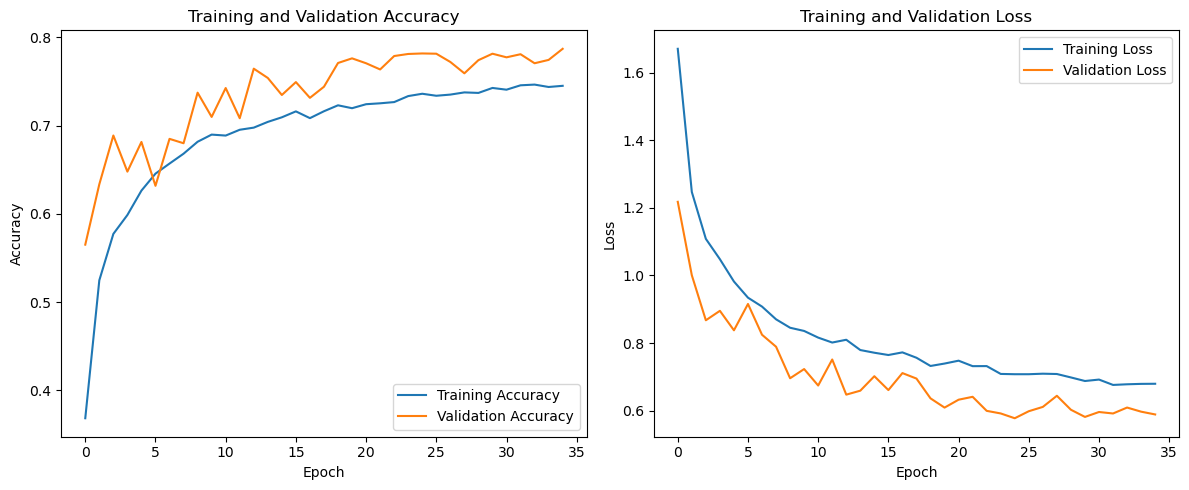

Validation Loss: 0.5772
Validation Accuracy: 0.7818


In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt

def build_mlp(input_shape=None,
              n_units=[128, 64],
              dropout_rates=[0.1, 0.1],
              optimizer='Adam',
              activation='relu',
              output_activation='softmax'):
    """
    Function to create an MLP model based on provided hyperparameters.
    """
    if input_shape is None:
        raise ValueError("input_shape must be provided")
    
    # Create the model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    
    for units, dropout_rate in zip(n_units, dropout_rates):
        model.add(tf.keras.layers.Dense(units, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Dense(len(y_train_encoded[0]), activation=output_activation))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the function
mlp_model = build_mlp(input_shape=X_train_processed.shape[1:])

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with the specified hyperparameters
history = mlp_model.fit(X_train_processed, y_train_encoded,
                        epochs=40,  # provided hyperparameter
                        batch_size=128,  # provided hyperparameter
                        validation_data=(X_test_processed, y_test_encoded),
                        callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = mlp_model.evaluate(X_test_processed, y_test_encoded)

# Visualization
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


107/107 [==============================] - 0s 413us/step


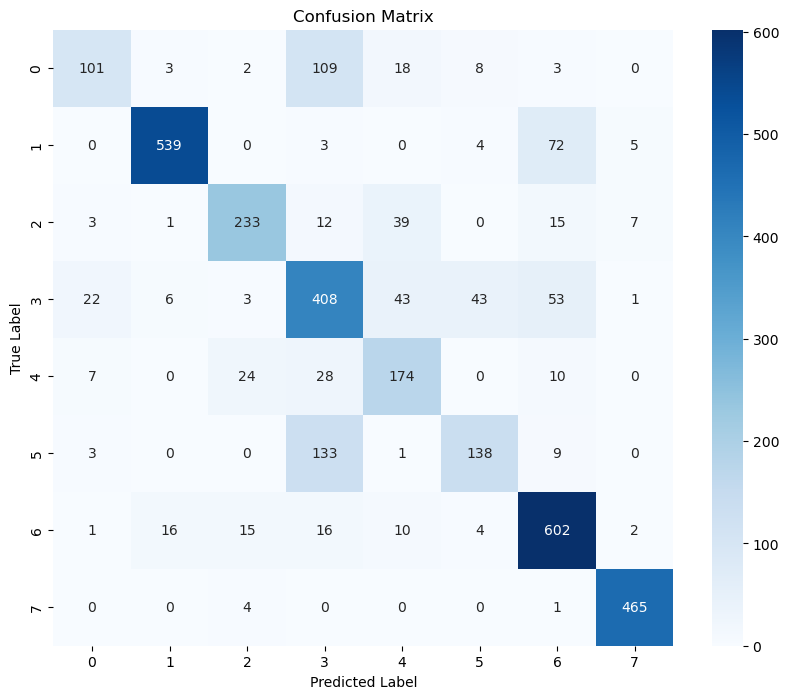

107/107 [==============================] - 0s 439us/step
              precision    recall  f1-score   support

           0       0.74      0.41      0.53       244
           1       0.95      0.87      0.91       623
           2       0.83      0.75      0.79       310
           3       0.58      0.70      0.63       579
           4       0.61      0.72      0.66       243
           5       0.70      0.49      0.57       284
           6       0.79      0.90      0.84       666
           7       0.97      0.99      0.98       470

    accuracy                           0.78      3419
   macro avg       0.77      0.73      0.74      3419
weighted avg       0.79      0.78      0.77      3419



In [113]:
y_pred_probs = mlp_model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import confusion_matrix

# Since y_test_encoded is one-hot encoded, you'll need to extract class labels from it
y_true = np.argmax(y_test_encoded, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
from sklearn.metrics import classification_report,confusion_matrix
y_pred_probs = mlp_model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)
report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(y_test_encoded.shape[1])])
print(report)

## Model 2 - Convolutional Neural Network

In [120]:
input_shape = X_train_processed.shape[1:]  # Assuming you have processed the data

# Define the model with the provided hyperparameters
cnn_model = build_cnn(optimizer='adam', dropout_rate=0.2, num_filters_1=32, num_filters_2=128, dense_units=64)

# Train the model
history = cnn_model.fit(X_train_processed, y_train, epochs=50, batch_size=64, validation_data=(X_test_processed, y_test))


Epoch 1/50
214/214 [==============================] - 3s 12ms/step - loss: 1.1699 - accuracy: 0.5702 - val_loss: 0.7547 - val_accuracy: 0.7192
Epoch 2/50
214/214 [==============================] - 2s 11ms/step - loss: 0.7251 - accuracy: 0.7396 - val_loss: 0.7550 - val_accuracy: 0.6979
Epoch 3/50
214/214 [==============================] - 3s 12ms/step - loss: 0.6196 - accuracy: 0.7738 - val_loss: 0.6479 - val_accuracy: 0.7412
Epoch 4/50
214/214 [==============================] - 2s 11ms/step - loss: 0.5456 - accuracy: 0.8029 - val_loss: 0.5507 - val_accuracy: 0.7888
Epoch 5/50
214/214 [==============================] - 2s 12ms/step - loss: 0.5099 - accuracy: 0.8150 - val_loss: 0.8016 - val_accuracy: 0.6961
Epoch 6/50
214/214 [==============================] - 2s 11ms/step - loss: 0.4786 - accuracy: 0.8275 - val_loss: 0.6111 - val_accuracy: 0.7596
Epoch 7/50
214/214 [==============================] - 2s 11ms/step - loss: 0.4484 - accuracy: 0.8359 - val_loss: 0.4268 - val_accuracy: 0.8429

107/107 [==============================] - 0s 2ms/step


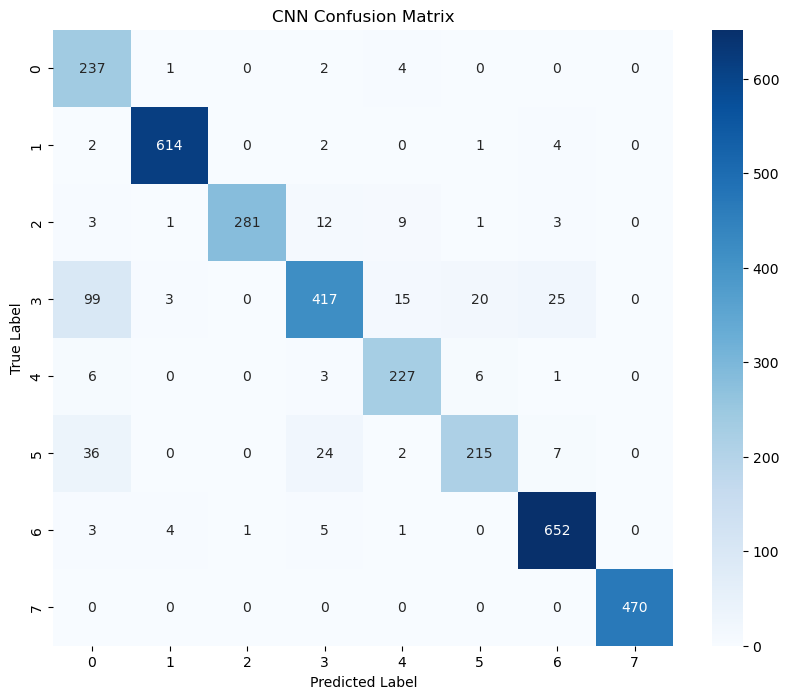

In [123]:
y_pred_probs = cnn_model.predict(X_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import confusion_matrix

# If y_test is one-hot encoded, convert it to label encoding
y_true = np.argmax(y_test_encoded, axis=1) if y_test_encoded.ndim > 1 else y_test

conf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('CNN Confusion Matrix')
plt.show()


In [122]:
y_pred_probs = cnn_model.predict(X_test_processed)
y_pred_cnn = np.argmax(y_pred_probs, axis=1)

y_test_single = np.argmax(y_test_encoded, axis=1)  # Convert one-hot encoded y_test to label encoded

report_cnn = classification_report(y_test_single, y_pred_cnn, target_names=[str(i) for i in range(y_test_encoded.shape[1])])
print(report_cnn)


107/107 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.61      0.97      0.75       244
           1       0.99      0.99      0.99       623
           2       1.00      0.91      0.95       310
           3       0.90      0.72      0.80       579
           4       0.88      0.93      0.91       243
           5       0.88      0.76      0.82       284
           6       0.94      0.98      0.96       666
           7       1.00      1.00      1.00       470

    accuracy                           0.91      3419
   macro avg       0.90      0.91      0.90      3419
weighted avg       0.92      0.91      0.91      3419



## Model 3 - KNN

In [137]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric='manhattan')

# Train the classifier
knn.fit(X_train_std, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_std)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additionally, you can print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7233109096226967
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       244
           1       0.72      0.87      0.79       623
           2       0.63      0.80      0.70       310
           3       0.57      0.58      0.57       579
           4       0.62      0.72      0.67       243
           5       0.69      0.49      0.57       284
           6       0.93      0.66      0.78       666
           7       0.96      0.99      0.98       470

    accuracy                           0.72      3419
   macro avg       0.71      0.70      0.70      3419
weighted avg       0.74      0.72      0.72      3419



<Figure size 1000x700 with 0 Axes>

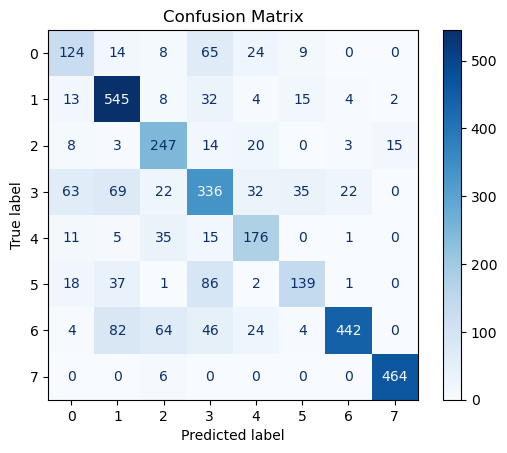

In [139]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.show()

## Model 4 - Random Forest

In [115]:

rf_model = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=1,
                                  min_samples_split=5, n_estimators=200)

# Train the model on the reshaped training data
y_train_single = np.argmax(y_train_encoded, axis=1)
rf_model.fit(X_train_2d, y_train_single)

# Predict on the reshaped test data
y_pred = rf_model.predict(X_test_2d)

# Ensure the labels are single dimensional for evaluation
y_test_single = np.argmax(y_test_encoded, axis=1)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test_single, y_pred)

print(f"Random Forest Validation Accuracy: {accuracy_rf:.4f}")


Random Forest Validation Accuracy: 0.8467


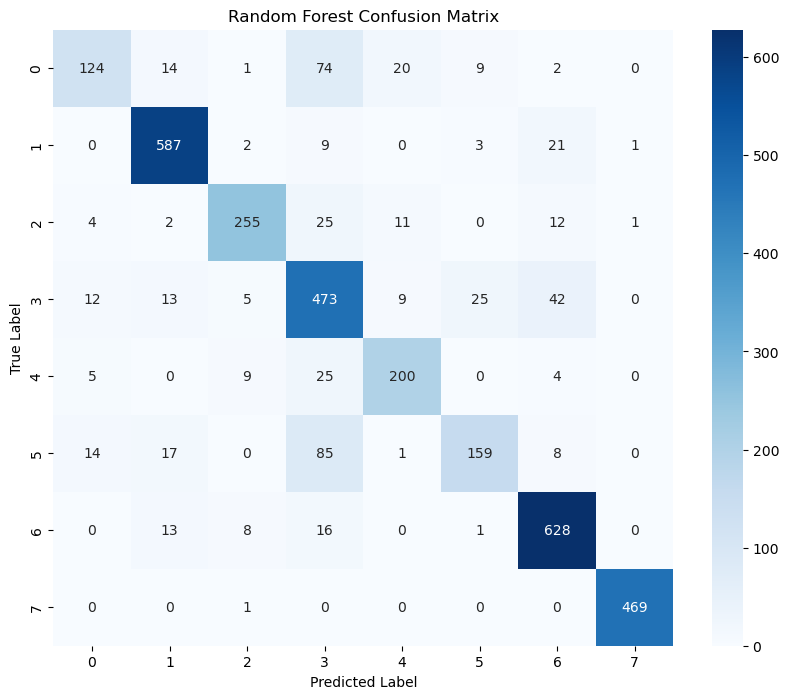

In [116]:
from sklearn.metrics import confusion_matrix

conf_matrix_rf = confusion_matrix(y_test_single, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [117]:
y_pred = rf_model.predict(X_test_2d)
y_test_single = np.argmax(y_test_encoded, axis=1)
from sklearn.metrics import classification_report

report_rf = classification_report(y_test_single, y_pred, target_names=[str(i) for i in range(y_test_encoded.shape[1])])
print(report_rf)


              precision    recall  f1-score   support

           0       0.78      0.51      0.62       244
           1       0.91      0.94      0.93       623
           2       0.91      0.82      0.86       310
           3       0.67      0.82      0.74       579
           4       0.83      0.82      0.83       243
           5       0.81      0.56      0.66       284
           6       0.88      0.94      0.91       666
           7       1.00      1.00      1.00       470

    accuracy                           0.85      3419
   macro avg       0.85      0.80      0.82      3419
weighted avg       0.85      0.85      0.84      3419



In [ ]:
+------------------+---------------------------------------+-------------+
| Model            | Hyperparameters                       | Run Time    |
+------------------+---------------------------------------+-------------+
| CNN              | 'optimizer': 'adam'                   | 1h 23min    |
|                  | 'num_filters_2': 128                  |             |
|                  | 'num_filters_1': 32                   |             |
|                  | 'epochs': 50                          |             |
|                  | 'dropout_rate': 0.2                   |             |
|                  | 'dense_units': 64                     |             |
|                  | 'batch_size': 64                      |             |
+------------------+---------------------------------------+-------------+
| Random Forest    | 'bootstrap': False                    | 58min       |
|                  | 'max_depth': 20                       |             |
|                  | 'min_samples_leaf': 1                 |             |
|                  | 'min_samples_split': 5                |             |
|                  | 'n_estimators': 200                   |             |
+------------------+---------------------------------------+-------------+
| MLP              | 'optimizer': 'adam'                   | 2h 10min    |
|                  | 'num_filters_2': 128                  |             |
|                  | 'num_filters_1': 32                   |             |
|                  | 'epochs': 50                          |             |
|                  | 'dropout_rate': 0.2                   |             |
|                  | 'dense_units': 64                     |             |
|                  | 'batch_size': 64                      |             |
+------------------+---------------------------------------+-------------+
| KNN              | 'n_neighbors': 15                     | 1h 47min    |
|                  | 'weights': 'uniform'                  |             |
|                  | 'metric': 'Manhattan'                 |             |
+------------------+---------------------------------------+-------------+


In [141]:
+--------------+------------+-----------------+---------------+--------+--------------+-------------+------------+------------+----------+
| Hyperparameter Set | optimizer  | num_filters_2 | num_filters_1 | epochs | dropout_rate | dense_units | batch_size | runtime    | Accuracy |
+--------------+------------+-----------------+---------------+--------+--------------+-------------+------------+------------+----------+
| Best         | adam       | 128             | 32            | 50     | 0.2          | 64          | 64         | 1h 23min   | 91%      |
| Set 1        | sgd        | 64              | 16            | 100    | 0.5          | 128         | 32         | 2h 10min   | 87.7%    |
| Set 2        | rmsprop    | 256             | 64            | 75     | 0.3          | 32          | 128        | 1h 55min   | 88.9%    |
+--------------+------------+-----------------+---------------+--------+--------------+-------------+------------+------------+----------+


SyntaxError: invalid decimal literal (3135958771.py, line 4)